In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

from utils import transform_into_bins
from utils import spherical_dist


#from scipy.optimize import curve_fit



In [5]:
path = 'clean_data/master_salary.csv'
master_salary = pd.read_csv(path)
df = master_salary.copy()




In [51]:
df.head()

,codgeo,libgeo,salaire_moyen,salaire_moyen_cad,salaire_moyen_prof_int,salaire_moyen_emp,salaire_moyen_ouv,salaire_moyen_fem,salaire_moyen_fem_cad,salaire_moyen_fem_prof_int,salaire_moyen_fem_emp,salaire_moyen_fem_ouv,salaire_moyen_hom,salaire_moyen_hom_cad,salaire_moyen_hom_prof_int,salaire_moyen_hom_emp,salaire_moyen_hom_ouv,salaire_moyen_18-26,salaire_moyen_26-50,salaire_moyen_50+,salaire_moyen_fem_18-26,salaire_moyen_fem_26-50,salaire_moyen_fem_50+,salaire_moyen_hom_18-26,salaire_moyen_hom_26-50,salaire_moyen_hom_50+,numero_departement,code_region,nom_region,chef.lieu_region,latitude,longitude,nb_ent,nb_ent_0,nb_ent_1-5,nb_ent_6-10,nb_ent_11-20,nb_ent_21-50,nb_ent_51-99,nb_ent_100-199,nb_ent_200-499,nb_ent_500+,pop_total,pop_age_0-5,pop_age_5-10,pop_age_10-15,pop_age_15-20,pop_age_20-25,pop_age_25-30,pop_age_30-35,pop_age_35-40,pop_age_40-45,pop_age_45-50,pop_age_50-55,pop_age_55-60,pop_age_60-65,pop_age_65-70,pop_age_70-75,pop_age_75-80,pop_age_80+,pop_sexe_homme,pop_sexe_femme,pop_mode_cohabitation_enfant_dun_couple,pop_mode_cohabitation_enfant_dune_famille_monoparentale,pop_mode_cohabitation_adulte_dun_couple_sans_enfant,pop_mode_cohabitation_adulte_dun_couple_avec_enfant(s),pop_mode_cohabitation_adulte_dune_famille_monoparentale,pop_mode_cohabitation_personne_vivant_hors_famille_dans_un_menage_de_plusieurs_personnes,pop_mode_cohabitation_personne_vivant_seule,libelle_commune,code_departement,nombre_de_points_total,consommation_totale,nombre_de_points_filiere_electricité,consommation_filiere_electricité,nombre_de_points_filiere_gaz,consommation_filiere_gaz,nombre_de_points_libelle_categorie_consommation_entreprises,consommation_libelle_categorie_consommation_entreprises,nombre_de_points_libelle_categorie_consommation_non renseigne,consommation_libelle_categorie_consommation_non renseigne,nombre_de_points_libelle_categorie_consommation_petits professionels,consommation_libelle_categorie_consommation_petits professionels,nombre_de_points_libelle_categorie_consommation_résidentiel,consommation_libelle_categorie_consommation_résidentiel,nombre_de_points_libelle_categorie_consommation_résidentiel + petits professionnels,consommation_libelle_categorie_consommation_résidentiel + petits professionnels,nombre_de_points_libelle_grand_secteur_agriculture,consommation_libelle_grand_secteur_agriculture,nombre_de_points_libelle_grand_secteur_industrie,consommation_libelle_grand_secteur_industrie,nombre_de_points_libelle_grand_secteur_secteur inconnu,consommation_libelle_grand_secteur_secteur inconnu,nombre_de_points_libelle_grand_secteur_tertiaire,consommation_libelle_grand_secteur_tertiaire,nombre_de_points_libelle_grand_secteur_résidentiel,consommation_libelle_grand_secteur_résidentiel,max_conso,max_conso_secteur,distance_to_chef_lieu
0,1004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,10.1,9.6,15.0,26.4,16.7,11.0,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6,1,82.0,Rhône-Alpes,Lyon,45.950000,5.350000,996.0,577.0,272.0,63.0,46.0,24.0,9.0,3.0,2.0,0.0,13460.0,1023.0,809.0,871.0,901.0,824.0,1057.0,913.0,828.0,839.0,903.0,823.0,815.0,737.0,621.0,449.0,410.0,637.0,6477.0,6983.0,2885.0,1026.0,3196.0,3080.0,642.0,390.0,2241.0,Ambérieu-en-Bugey,1.0,103418.0,1.269513e+06,76099.0,663813.915433,27319.0,605698.721551,1150.0,357961.841629,5.0,1054.318333,2853.0,44932.941730,21649.0,160040.955292,77761.0,705522.58,0.0,0.000000,335.0,38951.348807,468.0,4785.467174,3205.0,360212.285712,99410.0,865563.535292,360212.285712,1,44.647413
1,1007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,10.6,10.0,14.7,23.3,15.8,11.3,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4,1,82.0,Rhône-Alpes,Lyon,46.000000,5.350000,124.0,87.0,20.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,2563.0,200.0,230.0,130.0,115.0,85.0,155.0,185.0,149.0,240.0,179.0,165.0,185.0,160.0,100.0,105.0,90.0,90.0,1229.0,1334.0,635.0,135.0,600.0,700.0,90.0,135.0,268.0,Ambronay,1.0,13684.0,1.411495e+05,12410.0,102191.467309,1274.0,38958.019271,113.0,17077.014544,0.0,0.000000,316.0,4207.201462,

# Répartition du salaire net moyen


In [3]:
#Ajout de la variable "tranche" pour découper le salaire net moyen en 4 tranches.

df['tranche'] = pd.cut(df['salaire_moyen'], bins = [0,15,20,30,72], labels = ['moins 15','moins 20','moins 30', 'plus 30'])



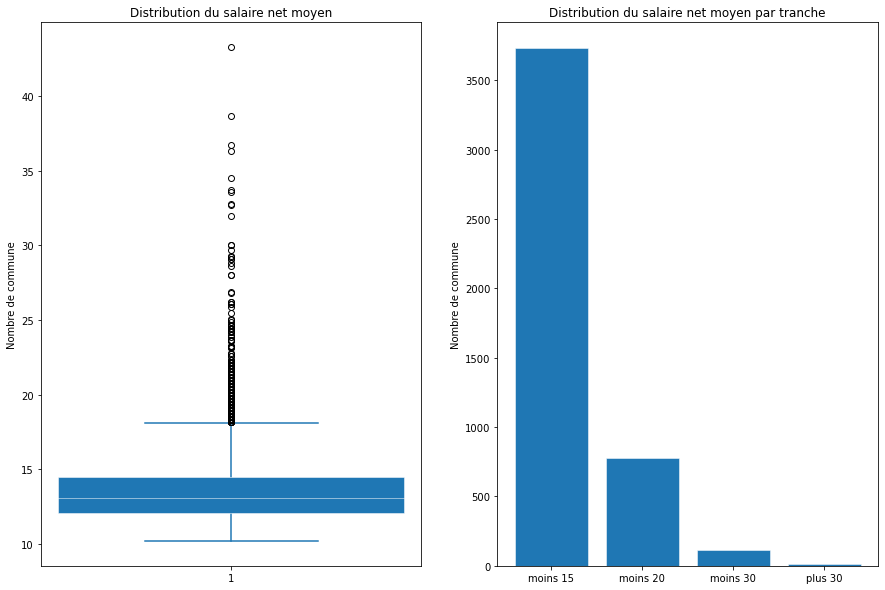

In [181]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.boxplot(df['salaire_moyen'], widths=1.5, patch_artist=True,
                showmeans=False, #showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
plt.title("Distribution du salaire net moyen")
plt.ylabel("Nombre de commune")

plt.subplot(122)
plt.bar(df['tranche'].unique(), df['tranche'].value_counts().values, linewidth=0.5, edgecolor="white")
plt.title("Distribution du salaire net moyen par tranche")
plt.ylabel("Nombre de commune")
plt.savefig('Distribution_Salaire_moyen.png', facecolor='w')
plt.show()


Le salaire moyen reste similaire dans la majorité des communes de France mais il y a bien un groupe de communes dont  le salaire au-dessus de la moyenne

<Figure size 1440x1440 with 0 Axes>

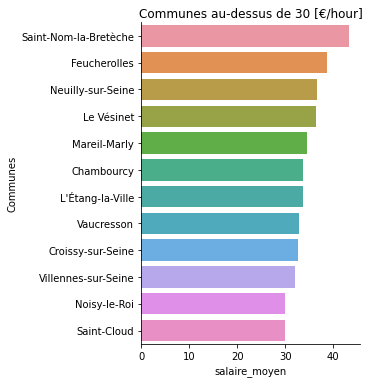

In [202]:
communes_sup_30 = df[['codgeo','libgeo','salaire_moyen']][df['salaire_moyen'] >= 30].sort_values('salaire_moyen', ascending=False)

plt.figure(figsize=(20, 20))
sns.catplot(y='libgeo', x= 'salaire_moyen', data=communes_sup_30, kind = 'bar')
plt.ylabel("Communes")
plt.title("Communes au-dessus de 30 [€/hour]")
plt.savefig('Communes_au_dessus_30.png', facecolor='w')
plt.show()

## Salaire net et Population

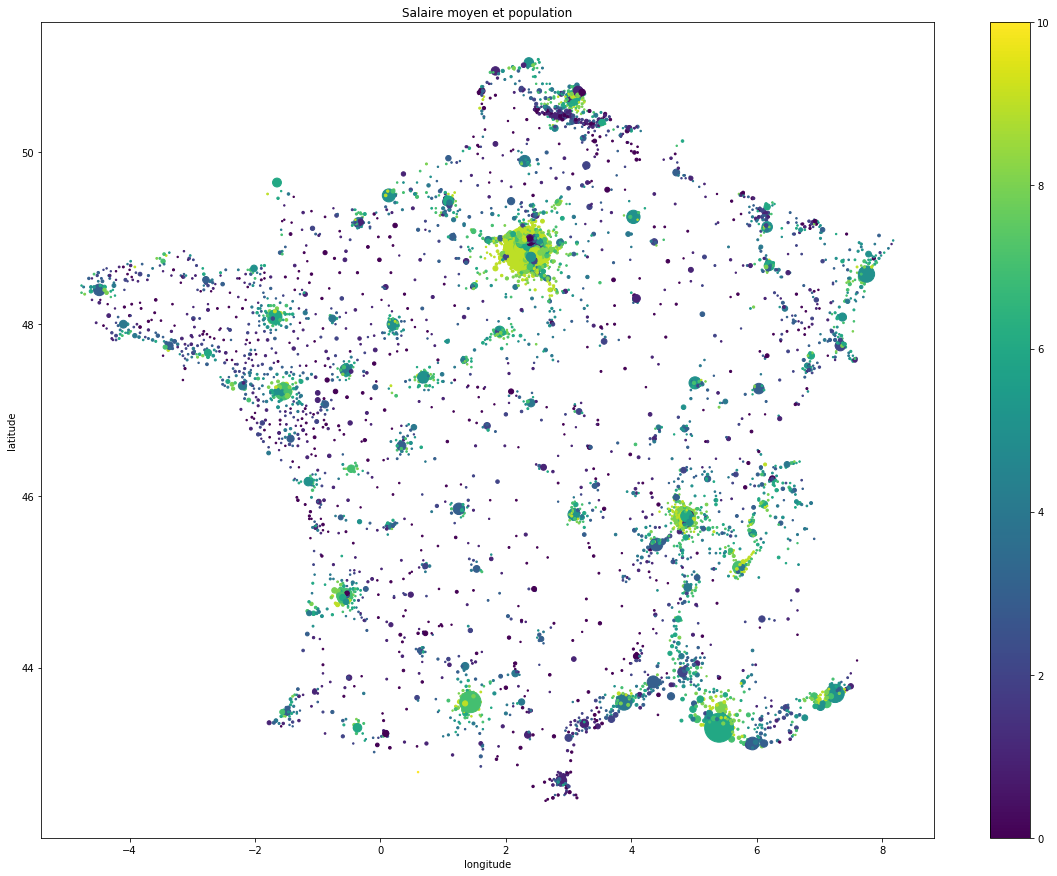

In [136]:
plt.figure(figsize=(20, 15))
plt.scatter(
    df['longitude'],
    df['latitude'],
    s=df['pop_total']*0.001, # le paramètre taille en fonction du nb total de population
    c=transform_into_bins(df['salaire_moyen']),# colorée en focntion du salaire net
    )
plt.title('Salaire moyen et population')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar()
plt.savefig('carte_salaire_moyen_pop_bg.png', facecolor='w')
plt.show()

La taille des points sur la carte est en fonction du nombre de la population dans les communes, plus la taille est grande plus la population est importante.
la couleur des points sur la carte indique le niveau du salaire moyen, plus la couleur est claire plus le salaire moyen est elevé.
Il semble bien que la région parisienne est de loin la région la plus peuplée et dont le salaire moyen est le plus élevé.
la couleur est plus claire au niveau des grandes villes et des grandes agglomérations et dont la population est aussi plus importante.

Il semble donc que la population renforce les points de couleurs claires.

Analysons si il y a un lien de corrélation entre le nombre de population d’une commune et son salaire net moyen

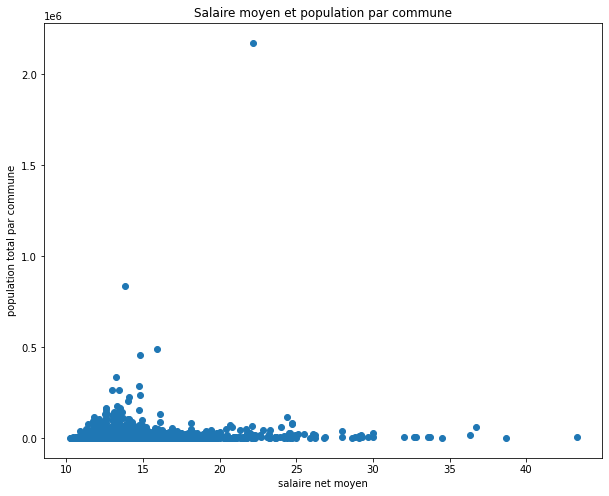

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(
    df['salaire_moyen'],
    df['pop_total']
    ,
    )
plt.title('Salaire moyen et population par commune')
plt.xlabel("salaire net moyen")
plt.ylabel("population total par commune")
plt.savefig('salaire_pop.png', facecolor='w')
plt.show()

# Salaire vs Distance

In [132]:
commune = 'Lyon'
distance = 150

['Rhône-Alpes' 'Auvergne' 'Bourgogne' 'Franche-Comté'
 'Languedoc-Roussillon']
(660, 101)


C:\Users\SIDIOM~1\AppData\Local\Temp/ipykernel_47772/2079435496.py:20: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



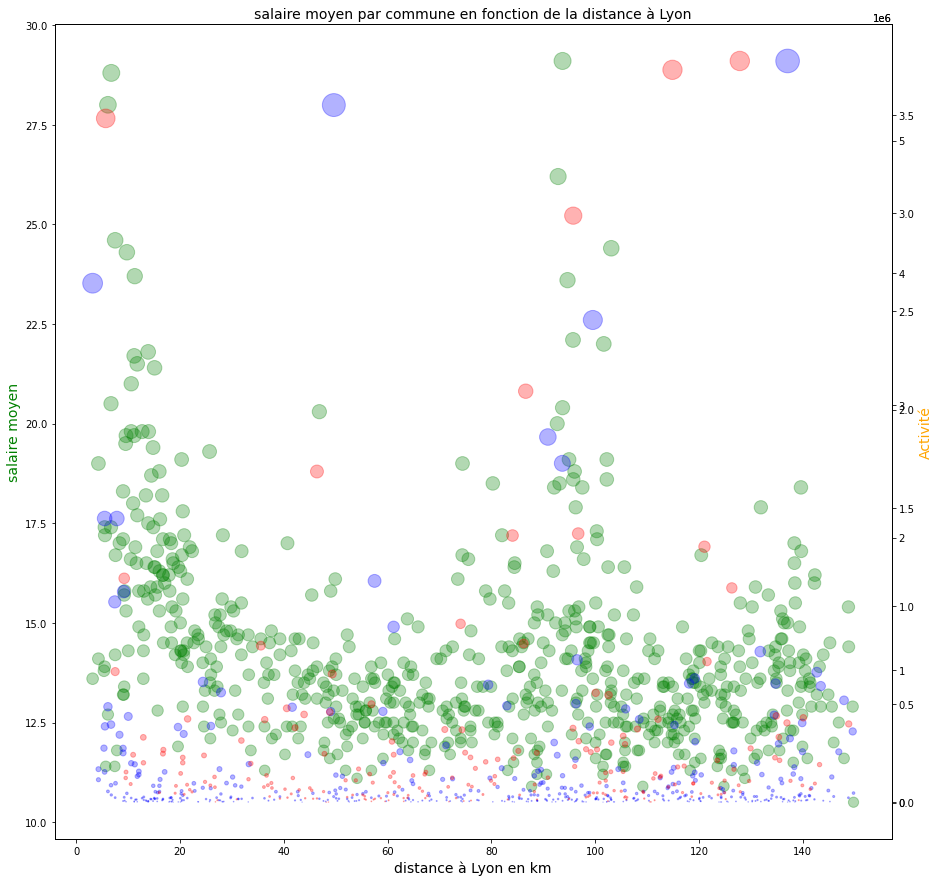

In [134]:
#Exemples de Lyon


position1 = df[['latitude', 'longitude']].values
position2 = df[df['libgeo'] == commune][['latitude', 'longitude']].values[0, :]

distance_to_commune = spherical_dist(position1, position2)
df2 = df.assign(distance_to_commune = distance_to_commune)

df2 = df2[df2['libgeo'] != commune]

df_commune = df2[df2['distance_to_commune']<distance] 


print(df_commune['nom_region'].unique())
print(df_commune.shape)
['Rhône-Alpes' 'Auvergne' 'Bourgogne' 'Franche-Comté'
 'Languedoc-Roussillon']
(660, 101)
df_commune2 = df_commune[df['nom_region'].isin(['Rhône-Alpes', 'Auvergne', 'Bourgogne', 'Franche-Comté'])]
colors = {
    1: 'b',
    0: 'r',
   }

secteurs = df_commune2['max_conso_secteur'].unique()

fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(df_commune2['distance_to_commune'], df_commune2['salaire_moyen'], color = 'green',
          s=df_commune2['salaire_moyen']*10, alpha = 0.3, label = "salaire moyen")
#ax.plot(df_commune2['chef.lieu_region'].unique(), df_commune2.groupby(['chef.lieu_region'])['salaire_moyen'].mean())
ax.set_xlabel("distance à {} en km".format(commune), fontsize = 14)
ax.set_ylabel("salaire moyen", fontsize = 14, color = 'green')

for i, val in enumerate(secteurs):
    ax2 = ax.twinx()
    ax2.scatter(df_commune2['distance_to_commune'][df_commune2['max_conso_secteur']==val], 
                df_commune2['max_conso'][df_commune2['max_conso_secteur']==val], 
                color = colors[val],
                s = df_commune2['max_conso'][df_commune2['max_conso_secteur']==val]*0.0001, 
                alpha = 0.3, label = "val")
ax2.set_ylabel("Activité", color  = "orange", fontsize = 14)

plt.title("salaire moyen par commune en fonction de la distance à {}".format(commune), fontsize = 14)
plt.savefig('carte_salaire_population_secteur_bg.png', facecolor='w')
plt.show()


Les points en vert sont de même taille et indiquent le niveau du salaire moyen représenté par l’axe des ordonnées à droite.
Les points en bleu indiquent l’activité tertiaire et ceux en rouge indiquent une activité industrielle. La taille en bleu et en rouge varient en fonction du niveau de la consommation représenté par l’axe des ordonnées à gauche.
 
Comme pour lors de la visualisation de la population et du nombres d’entreprises par ville, en fonction de la distance à Lyon, on note des salaires moyens plus élevés à Lyon et à proximité, puis une diminution du salaire moyen (hors à Saint-Etienne) , et enfin, à proximité de Grenoble (93 km de Lyon), puis de Clermont-Ferrand (137 km de Lyon) des salaires moyens à nouveaux plus élevés, c’est-à-dire supérieurs à 17,5€ / heure. On confirme donc que la distance des communes à un Métropole a un impact sur la population des communes, le nombres d’entreprises présentent et également le niveau de salaire moyen, jusqu’à « se rapprocher » d’une autre Métropole. 


# Écarts de rémunération femmes-hommes

le jeu de données dans son état actuel ne permet pas directement de faire des analyses et visualisations par sexe, âge et catégorie socioprofessionnelle.

Par exemple : la variable salaire_moyen_fem_cad indique salaire net moyen par heure pour les cadres féminins. 

index	salaire_moyen_fem_cad
0	19.1
1	19.0
2	19.5
3	19.0
4	19.4

les variables catrégorielles sexe et catégorie socioprofessionnelle sont inclus dans cette information mais il n'est pas possible de les exploiter.

On peut donc transformer cette variable salaire_moyen_fem_cad en trois variables : 

  codgeo	salaire	sexe	position
0	01004	19.1	1	   4
1	01007	19.0	1	   4
2	01014	19.5	1	   4
3	01024	19.0	1	   4
4	01025	19.4	1	   4

Ainsi, nous pourrions recréer notre jeu de données pour pouvoir analyser par sexe, âge et catégorie socioprofessionnelle.

In [69]:
dict1 = {}
dict1["salaire_moyen_fem_cad"] = {"sexe": "Femmes" , "position": 4}
dict1["salaire_moyen_fem_prof_int"] = {"sexe": "Femmes", "position": 3}
dict1["salaire_moyen_fem_emp"] = {"sexe": "Femmes", "position": 2}
dict1["salaire_moyen_fem_ouv"] = {"sexe": "Femmes", "position": 1}
dict1["salaire_moyen_hom_cad"] = {"sexe": "Hommes", "position": 4}
dict1["salaire_moyen_hom_prof_int"] = {"sexe": "Hommes", "position": 3}
dict1["salaire_moyen_hom_emp"] = {"sexe": "Hommes", "position": 2}
dict1["salaire_moyen_hom_ouv"] = {"sexe": "Hommes", "position": 1}

salaire = []
for index, row in df.iterrows():
    for key, value in dict1.items(): 
        dict2 = {}
        dict2["codgeo"] = row["codgeo"]
        dict2["sexe"] = value["sexe"]
        dict2["position"] = value["position"]
        dict2["salaire"] = row[key]
        dict2["latitude"] = row["latitude"]
        dict2["longitude"] = row["longitude"]
        salaire.append(dict2)
        
df_cat = pd.DataFrame(salaire)
df_cat.head(10)

,codgeo,sexe,position,salaire,latitude,longitude
0,1004,Femmes,4,19.1,45.95,5.35
1,1004,Femmes,3,13.2,45.95,5.35
2,1004,Femmes,2,10.1,45.95,5.35
3,1004,Femmes,1,9.6,45.95,5.35
4,1004,Hommes,4,26.4,45.95,5.35
5,1004,Hommes,3,16.7,45.95,5.35
6,1004,Hommes,2,11.0,45.95,5.35
7,1004,Hommes,1,11.6,45.95,5.35
8,1007,Femmes,4,19.0,46.00,5.35
9,1007,Femmes,3,13.3,46.00,5.35


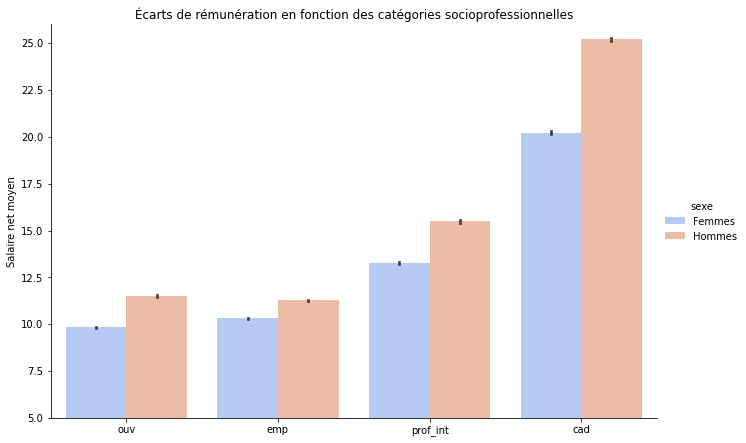

In [66]:
g = sns.catplot(x="position", y='salaire', data=df_cat, hue='sexe' ,palette="coolwarm", kind='bar', height=6, aspect=1.5)
g.set_xticklabels(["ouv", "emp", "prof_int", "cad"])
g.set_axis_labels("", "Salaire net moyen")
g.set(ylim=(5, 26))
plt.title("Écarts de rémunération en fonction des catégories socioprofessionnelles", loc="center")
plt.savefig('Ecarts_remuneration_categories_socioprofessionnelle.png', facecolor='w')
plt.show()







In [79]:
dict3 = {}
dict3["salaire_moyen_fem_18-26"] = {"sexe": "Femmes", "groupe_age": 1}
dict3["salaire_moyen_fem_26-50"] = {"sexe": "Femmes", "groupe_age": 2}
dict3["salaire_moyen_fem_50+"] = {"sexe": "Femmes", "groupe_age": 3}
dict3["salaire_moyen_hom_18-26"] = {"sexe": "Hommes", "groupe_age": 1}
dict3["salaire_moyen_hom_26-50"] = {"sexe": "Hommes", "groupe_age": 2}
dict3["salaire_moyen_hom_50+"] = {"sexe": "Hommes", "groupe_age": 3}

salaire = []
for index, row in df.iterrows():
    for key, value in dict3.items(): 
        dict4 = {}
        dict4["codgeo"] = row["codgeo"]
        dict4["sexe"] = value["sexe"]
        dict4["groupe_age"] = value["groupe_age"]
        dict4["salaire"] = row[key]
        salaire.append(dict4)
        
df_age = pd.DataFrame(salaire)
df_age.head(10)

,codgeo,sexe,groupe_age,salaire
0,1004,Femmes,1,9.7
1,1004,Femmes,2,11.8
2,1004,Femmes,3,12.5
3,1004,Hommes,1,11.0
4,1004,Hommes,2,14.9
5,1004,Hommes,3,18.6
6,1007,Femmes,1,9.2
7,1007,Femmes,2,12.2
8,1007,Femmes,3,12.5
9,1007,Hommes,1,10.2


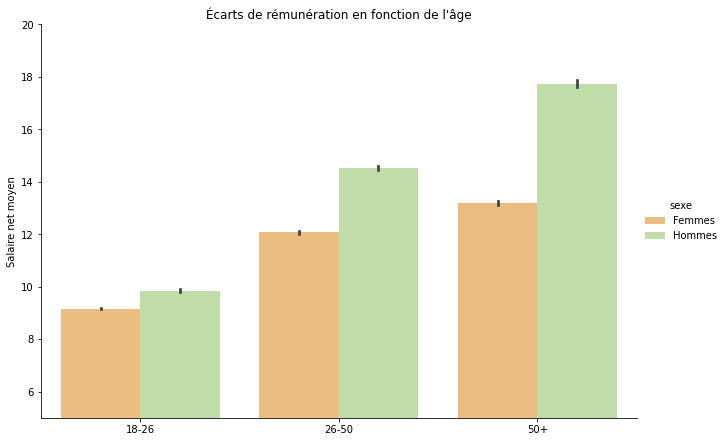

In [83]:
g = sns.catplot(x="groupe_age", y='salaire', data=df_age, hue='sexe', palette="Spectral", kind='bar', height=6, aspect=1.5)
g.set_xticklabels(["18-26", "26-50", "50+"])
g.set_axis_labels("", "Salaire net moyen")
g.set(ylim=(5, 20))
plt.title("Écarts de rémunération en fonction de l'âge")
plt.savefig('Ecarts_remuneration_age.png', facecolor='w')
plt.show()

Simon Georges-Kot (division Salaires et revenus d’activité, Insee)

Les inégalités professionnelles entre les femmes et les hommes prennent des formes multiples. En premier lieu, les inégalités de volume de travail, les femmes étant bien plus souvent à temps partiel que les hommes. Pour les plus jeunes, les moins diplômés, les parents d’enfants en bas âge, ces inégalités de volume de travail sont le principal facteur pesant sur l’écart de revenu salarial.

S’y ajoutent les inégalités de salaire pour un même volume de travail, qui sont faibles au début de la vie active mais s’accroissent tout au long de la carrière. Elles proviennent principalement du fait que les femmes et les hommes ne travaillent pas dans les mêmes secteurs et n’occupent pas les mêmes emplois.

Les écarts de salaire entre les femmes et les hommes pour un même volume de travail se réduisent régulièrement depuis quarante ans. Ils ont diminué d’un quart sur les vingt dernières années. Les écarts de volume de travail se réduisent aussi, mais moins rapidement.

Les femmes accèdent moins aux emplois les mieux rémunérés, ce qui explique une grande partie de l’écart de salaire. Ces inégalités d’accès aux emplois les mieux rémunérés sont particulièrement élevées parmi les salariés ayant des enfants, si bien que les écarts de salaire entre les pères et les mères sont nettement plus importants qu’entre les femmes et les hommes sans enfant.